In [1]:
import itertools
import numpy as np
from matplotlib import pyplot as plt

import local

In [2]:
DATA = local.Data151v()

# Varallisuusosuudet

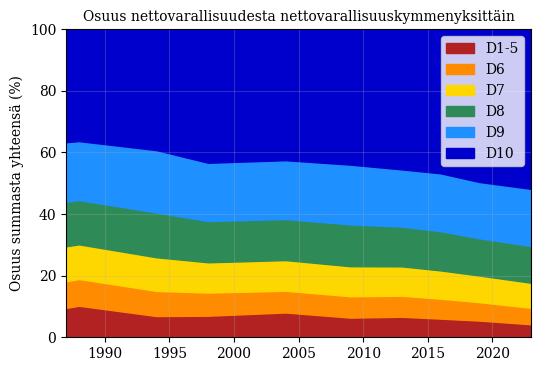

In [3]:
plt.figure(figsize=(6, 4))
local.plot.osuudet(plt.gca(), DATA, "nt", "n", local.colors.colors6b())
plt.title("Osuus nettovarallisuudesta nettovarallisuuskymmenyksittäin")
plt.savefig("osuus.png", bbox_inches="tight", dpi=150)
plt.show()

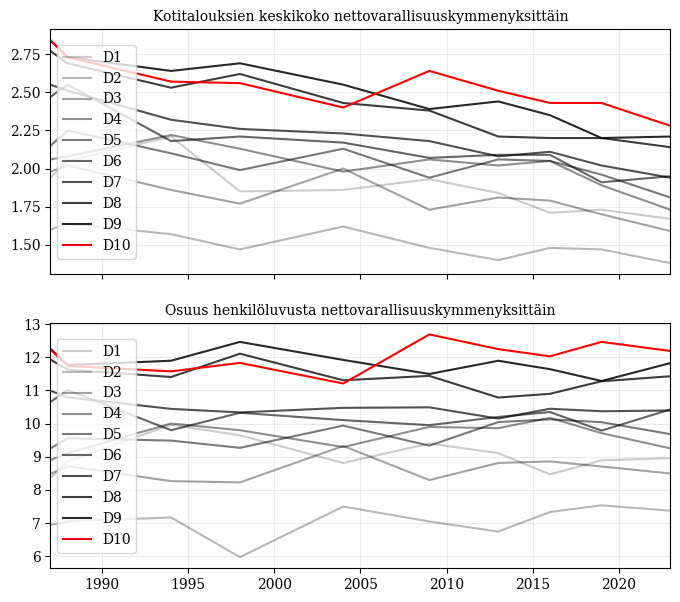

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(8, 7), sharex=True)
for d in DATA.luokat10:
    ax[0].plot(DATA.vuosi, DATA.h(d, "n", "hsz"), color=local.colors.colors10()[d], label=d)
    ax[1].plot(DATA.vuosi, DATA.hf(d, "n", "szt"), color=local.colors.colors10()[d], label=d)
ax[0].set_xlim(*DATA.vlim)
ax[0].legend(loc="center left")
ax[1].legend(loc="center left")
ax[0].set_title("Kotitalouksien keskikoko nettovarallisuuskymmenyksittäin")
ax[1].set_title("Osuus henkilöluvusta nettovarallisuuskymmenyksittäin")
plt.show()

# Varojen kehitys lajeittain

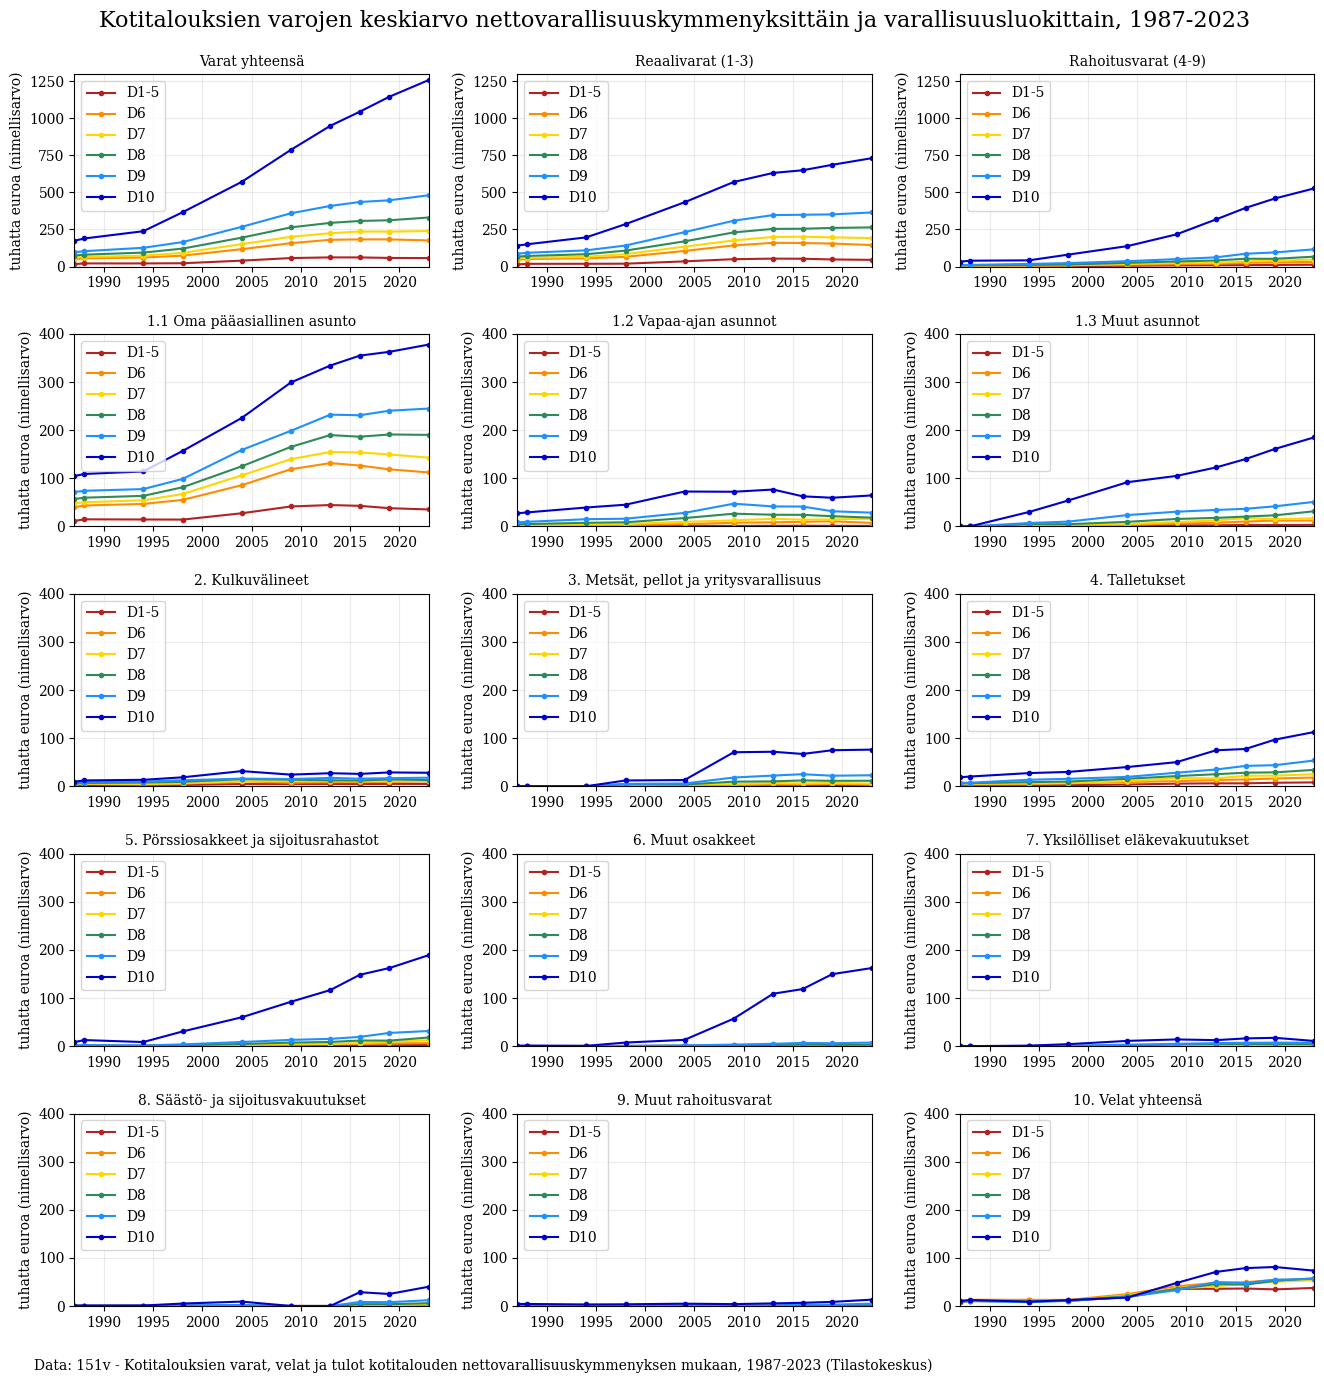

In [5]:
lajit = (
    "g", "vr", "vf",
    "a11", "a12", "a13",
    "a2", "a3", "a4",
    "a5", "a6", "a7",
    "a8", "a9", "la"
)
colors = local.colors.colors6b()

fig, ax = plt.subplots(5, 3, figsize=(16, 16))
ax = list(itertools.chain(*ax))

for i, l in enumerate(lajit):
    for d in DATA.luokat6:
        y = DATA.h(d, l, "nm") / 1e3 # / DATA.h("SS", "n", "rt")
        ax[i].plot(DATA.vuosi, y, color=colors[d], marker=".", label=d)
    ax[i].set_title(DATA.table.label_varallisuuslaji(l))
    ax[i].set_ylabel("tuhatta euroa (nimellisarvo)")
    ax[i].set_xlim(*DATA.vlim)
    ax[i].set_ylim(0, 1300 if i < 3 else 400)
    #ax[i].set_ylim(0, 400 if i < 3 else 120)
    ax[i].legend(loc="upper left")
plt.subplots_adjust(hspace=0.35, wspace=0.25)
plt.suptitle("Kotitalouksien varojen keskiarvo nettovarallisuuskymmenyksittäin ja varallisuusluokittain, 1987-2023", y=0.92)
fig.text(0.1, 0.07, "Data: 151v - Kotitalouksien varat, velat ja tulot kotitalouden nettovarallisuuskymmenyksen mukaan, 1987-2023 (Tilastokeskus)")
plt.savefig("varat.png", bbox_inches="tight", dpi=150)
plt.show()